In [127]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np
import common

In [128]:
df = pd.read_parquet('../data/processed/manual_pattern_annotations.parq')


In [131]:
flat_df = df.reset_index().melt(
    id_vars=["correctness", "start_time", "end_time", "duration", "pid", "tid", 'snippet']
).set_index(["pid", "tid"])


In [163]:
# g = sns.FacetGrid(flat_df, row='variable', col='value')

# g.map_dataframe(sns.histplot,)
# g.fig.tight_layout()
# plt.subplots_adjust(wspace=0.9)
cols = ['investment', 'selection_strategy', 'direction']
from IPython.display import display

for col in cols:
    display((df.groupby([col]).size() / len(df)).reset_index(name='%'))

,investment,%
0,Indepth,0.795522
1,Quick,0.204478


,selection_strategy,%
0,dynamic,0.625373
1,linear,0.374627


,direction,%
0,back and forth,0.322388
1,backward,0.088060
2,forward,0.589552


In [133]:
flat_df.groupby(["snippet", "variable", "value"]).size().reset_index(
    name="count"
).sort_values(by="count", ascending=False)

,snippet,variable,value,count
133,number_hrn,investment,Indepth,95
131,number_hrn,direction,forward,88
112,number_hrd,investment,Indepth,88
110,number_hrd,direction,forward,79
165,rectangle,selection_strategy,dynamic,74
...,...,...,...,...
58,insertion_sort,selection_strategy,back and forth,0
57,insertion_sort,selection_strategy,Quick,0
56,insertion_sort,selection_strategy,Indepth,0
55,insertion_sort,investment,linear,0


In [134]:
experiment_durations = pd.read_parquet('../data/processed/experiment_durations.parq')
correctness = common.load_correctness_data().set_index(['pid', 'tid'])
# experiment_durations.rename({'duration(s)': ''}).join(df).dropna()
experiment_durations = experiment_durations.join(correctness).dropna()

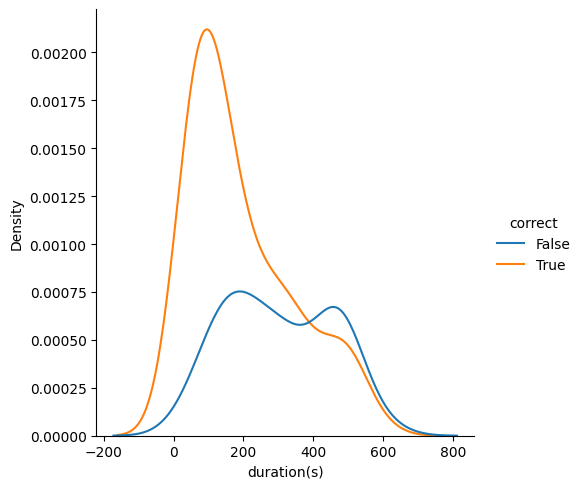

In [135]:
sns.displot(experiment_durations, x='duration(s)', hue='correct', kind='kde')

In [136]:
experiment_durations['duration(s)'].describe()

count    157.000000
mean     231.482561
std      157.715190
min       16.552000
25%      101.561000
50%      189.475000
75%      338.843000
max      607.865000
Name: duration(s), dtype: float64

In [137]:
experiment_durations.groupby(['snippet'])['duration(s)'].mean()

snippet
calculation       130.516647
distance          414.235500
graph_utils       392.203955
insertion_sort    222.065800
money_class        55.473667
number_checker     93.142133
numbers_hrd       285.494857
numbers_hrn       363.093897
rectangle         122.937238
Name: duration(s), dtype: float64

In [138]:
experiment_durations['duration_bin'] = pd.qcut(experiment_durations['duration(s)'], 5, labels=["VL", "L", "M", "H", "VH"])

experiment_durations.groupby(['duration_bin'])['correct'].mean()

duration_bin
VL    0.906250
L     0.774194
M     0.612903
H     0.548387
VH    0.406250
Name: correct, dtype: float64

In [139]:
experiment_durations.groupby(['snippet', 'duration_bin'])['correct'].mean()

snippet         duration_bin
calculation     VL              1.000000
                L               0.777778
                M               1.000000
                H               0.000000
                VH                   NaN
distance        VL                   NaN
                L                    NaN
                M               1.000000
                H                    NaN
                VH              1.000000
graph_utils     VL                   NaN
                L               1.000000
                M               0.500000
                H               0.333333
                VH              0.153846
insertion_sort  VL              1.000000
                L               0.500000
                M               0.250000
                H               0.666667
                VH              0.000000
money_class     VL              1.000000
                L                    NaN
                M               0.000000
                H           

### First Pattern incidence

In [140]:
# df.sort_values(by='start_time').groupby(['pid', 'tid', 'snippet']).mean()
# df.sort_values(by='start_time').groupby(['pid', 'tid', '']).first()
df['pattern'] = [
    (a, b, c)
    for a, b, c in zip(df['investment'], df['direction'], df['selection_strategy'])
] 

In [141]:
pattern_start_times = (
    df.sort_values(by="start_time")
    .groupby(["pid", "tid", "pattern"])["start_time"]
    .first()
    .reset_index()
)

pattern_start_times.groupby(["pattern"]).mean().reset_index().to_clipboard()


/var/folders/9t/pnh1mqks36vfw7ngs3d7n8r00000gn/T/ipykernel_87546/1017008314.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pattern_start_times.groupby(["pattern"]).mean().reset_index().to_clipboard()


In [142]:
df[df["pattern"] == ("Indepth", "back and forth", "linear")].drop(
    columns=["investment", "selection_strategy", "direction"]
)

snippet  correctness  start_time  end_time  duration  \
pid  tid                                                                
p47  t2      graph_utils        False          95       120        25   
p48  t3      graph_utils        False         205       290        85   
p52  t3      graph_utils        False          36        75        39   
     t3      graph_utils        False         139       163        24   
p89  t2        rectangle         True           0        13        13   
     t2        rectangle         True          45        48         3   
p99  t3        rectangle         True           0        25        25   
     t3        rectangle         True          27        45        18   
p75  t1       number_hrd         True         115       145        30   
p88  t2   insertion_sort        False          10        20        10   
     t2   insertion_sort        False          88        98        10   
     t2   insertion_sort        False         110       125        15   
     t2   insertion_sort        False         147       160        13   
p89  t3   insertion_sort         True          70        90        20   
     t3   insertion_sort         True         100       110        10   
p92  t2   insertion_sort        False           8        20        12   
     t2   insertion_sort        False          22        38        16   
     t2   insertion_sort        False          61        80        19   
     t2   insertion_sort        False         142       170        28   
p94  t3   insertion_sort         True          15        23         8   
     t3   insertion_sort         True          62        70         8   
     t3   insertion_sort         True          88       165        77   
p100 t4   insertion_sort        False          82       110        28   
p103 t2   insertion_sort        False         120       186        66   
p105 t2   insertion_sort         True          34        86        52   
p86  t4      calculation        False          35        65        30   
p101 t4      calculation         True          10        18         8   
p88  t4      calculation         True          27        41        14   
p101 t2      money_class         True          28        40        12   
p41  t2       number_hrn        False           0        24        24   
p68  t2       number_hrn         True         155       237        82   

                                    pattern  
pid  tid                                     
p47  t2   (Indepth, back and forth, linear)  
p48  t3   (Indepth, back and forth, linear)  
p52  t3   (Indepth, back and forth, linear)  
     t3   (Indepth, back and forth, linear)  
p89  t2   (Indepth, back and forth, linear)  
     t2   (Indepth, back and forth, linear)  
p99  t3   (Indepth, back and forth, linear)  
     t3   (Indepth, back and forth, linear)  
p75  t1   (Indepth, back and forth, linear)  
p88  t2   (Indepth, back and forth, linear)  
     t2   (Indepth, back and forth, linear)  
     t2   (Indepth, back and forth, linear)  
     t2   (Indepth, back and forth, linear)  
p89  t3   (Indepth, back and forth, linear)  
     t3   (Indepth, back and forth, linear)  
p92  t2   (Indepth, back and forth, linear)  
     t2   (Indepth, back and forth, linear)  
     t2   (Indepth, back and forth, linear)  
     t2   (Indepth, back and forth, linear)  
p94  t3   (Indepth, back and forth, linear)  
     t3   (Indepth, back and forth, linear)  
     t3   (Indepth, back and forth, linear)  
p100 t4   (Indepth, back and forth, linear)  
p103 t2   (Indepth, back and forth, linear)  
p105 t2   (Indepth, back and forth, linear)  
p86  t4   (Indepth, back and forth, linear)  
p101 t4   (Indepth, back and forth, linear)  
p88  t4   (Indepth, back and forth, linear)  
p101 t2   (Indepth, back and forth, linear)  
p41  t2   (Indepth, back and forth, linear)  
p68  t2   (Indepth, back and forth, linear)

In [143]:
df.groupby('pattern')['correctness'].mean().sort_values()

pattern
(Indepth, back and forth, linear)     0.483871
(Indepth, forward, linear)            0.567164
(Indepth, backward, dynamic)          0.592593
(Indepth, back and forth, dynamic)    0.600000
(Quick, forward, linear)              0.638298
(Quick, backward, linear)             0.650000
(Quick, forward, dynamic)             0.714286
(Quick, back and forth, linear)       0.722222
(Indepth, forward, dynamic)           0.755000
(Quick, backward, dynamic)            0.818182
(Quick, back and forth, dynamic)      0.851852
(Indepth, backward, linear)           1.000000
Name: correctness, dtype: float64

In [144]:
metadata = pd.read_parquet('../data/processed/experiment_metadata.parq')

In [145]:
df.query('snippet == "insertion_sort" & correctness == False')

snippet  correctness investment selection_strategy  \
pid  tid                                                              
p87  t1   insertion_sort        False    Indepth            dynamic   
     t1   insertion_sort        False      Quick             linear   
     t1   insertion_sort        False      Quick            dynamic   
     t1   insertion_sort        False      Quick             linear   
p88  t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth            dynamic   
     t2   insertion_sort        False    Indepth            dynamic   
     t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth            dynamic   
     t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False      Quick            dynamic   
     t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth            dynamic   
     t2   insertion_sort        False      Quick            dynamic   
p90  t3   insertion_sort        False      Quick             linear   
     t3   insertion_sort        False    Indepth            dynamic   
     t3   insertion_sort        False    Indepth             linear   
     t3   insertion_sort        False    Indepth             linear   
     t3   insertion_sort        False    Indepth            dynamic   
     t3   insertion_sort        False    Indepth            dynamic   
p91  t2   insertion_sort        False      Quick             linear   
     t2   insertion_sort        False      Quick             linear   
     t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth            dynamic   
     t2   insertion_sort        False    Indepth            dynamic   
p92  t2   insertion_sort        False    Indepth            dynamic   
     t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth             linear   
p95  t4   insertion_sort        False    Indepth             linear   
     t4   insertion_sort        False    Indepth            dynamic   
     t4   insertion_sort        False    Indepth            dynamic   
     t4   insertion_sort        False    Indepth             linear   
p97  t1   insertion_sort        False    Indepth             linear   
     t1   insertion_sort        False      Quick             linear   
     t1   insertion_sort        False    Indepth            dynamic   
     t1   insertion_sort        False    Indepth             linear   
     t1   insertion_sort        False    Indepth            dynamic   
p100 t4   insertion_sort        False    Indepth             linear   
     t4   insertion_sort        False    Indepth            dynamic   
     t4   insertion_sort        False    Indepth            dynamic   
     t4   insertion_sort        False    Indepth             linear   
     t4   insertion_sort        False    Indepth            dynamic   
p103 t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth            dynamic   
     t2   insertion_sort        False    Indepth             linear   
     t2   insertion_sort        False    Indepth            dynamic   
     t2   insertion_sort        False    Indepth             linear   
p106 t3   insertion_sort        False    

## Efficiency

In [146]:
efficient_participants = experiment_durations[
    experiment_durations["duration_bin"].isin(["VL", "L"])
].query("correct == True")
efficient_participants = df.join(efficient_participants.drop(columns='snippet'), how='right')

In [147]:
efficient_participants.groupby(['pattern'])['duration'].sum().sort_values()

pattern
(Indepth, backward, linear)             18.0
(Quick, backward, dynamic)              28.0
(Quick, back and forth, linear)         32.0
(Quick, backward, linear)               44.0
(Quick, forward, dynamic)               50.0
(Quick, forward, linear)                86.0
(Quick, back and forth, dynamic)        93.0
(Indepth, back and forth, linear)      145.0
(Indepth, backward, dynamic)           187.0
(Indepth, forward, linear)             585.0
(Indepth, back and forth, dynamic)     726.0
(Indepth, forward, dynamic)           1153.0
Name: duration, dtype: float64

In [148]:
efficient_participants['pattern'].value_counts()

(Indepth, forward, dynamic)           71
(Indepth, back and forth, dynamic)    39
(Indepth, forward, linear)            37
(Quick, forward, linear)              14
(Quick, back and forth, dynamic)      11
(Indepth, backward, dynamic)          10
(Indepth, back and forth, linear)      8
(Quick, back and forth, linear)        7
(Quick, backward, linear)              6
(Quick, backward, dynamic)             6
(Quick, forward, dynamic)              5
(Indepth, backward, linear)            1
Name: pattern, dtype: int64

In [149]:
efficient_participants.reset_index().groupby('pattern')['pid'].unique().str.len().sort_values()

pattern
(Indepth, backward, linear)            1
(Quick, forward, dynamic)              4
(Indepth, back and forth, linear)      5
(Quick, back and forth, linear)        5
(Quick, backward, dynamic)             5
(Quick, backward, linear)              5
(Indepth, backward, dynamic)           6
(Quick, forward, linear)               8
(Quick, back and forth, dynamic)      10
(Indepth, back and forth, dynamic)    13
(Indepth, forward, dynamic)           18
(Indepth, forward, linear)            18
Name: pid, dtype: int64

#### by snippet

In [150]:
def get_duration_bins(df):
    df['duration_bin'] = pd.qcut(df['duration(s)'], 3, labels=["L", "M", "H",])
    return df

by_snippet_duration_bins = experiment_durations.groupby('snippet').apply(get_duration_bins)

/var/folders/9t/pnh1mqks36vfw7ngs3d7n8r00000gn/T/ipykernel_87546/3165948151.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  by_snippet_duration_bins = experiment_durations.groupby('snippet').apply(get_duration_bins)


In [151]:
# efficient_participants = by_snippet_duration_bins[
#     by_snippet_duration_bins["duration_bin"].isin(["VL", "L"])
# ].query("correct == True")

# # print(efficient_participants['duration_bin'])
# efficient_participants = df.join(efficient_participants.drop(columns='snippet'), how='right')

with_normalized_durations = (
    df.groupby(["correctness", "pid", "tid", "pattern"])["duration"].sum()
    / df.groupby(["correctness", "pid", "tid"])["duration"].sum()
)
with_normalized_durations = with_normalized_durations.reset_index(name='normalized_duration').set_index(['pid', 'tid'])
with_normalized_durations = with_normalized_durations.join(by_snippet_duration_bins.drop(columns='duration(s)')).dropna().astype({'pattern': 'category'})

with_normalized_durations['snippet'].cat.remove_unused_categories(inplace=True)

/var/folders/9t/pnh1mqks36vfw7ngs3d7n8r00000gn/T/ipykernel_87546/489594401.py:15: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  with_normalized_durations['snippet'].cat.remove_unused_categories(inplace=True)


In [152]:
pats = with_normalized_durations.assign(pattern=with_normalized_durations['pattern'].str.join('/')).reset_index()


d = pats.groupby(['correctness', 'snippet', 'duration_bin', 'pattern'])['normalized_duration'].sum().reset_index()

/var/folders/9t/pnh1mqks36vfw7ngs3d7n8r00000gn/T/ipykernel_87546/1821137394.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/9t/pnh1mqks36vfw7ngs3d7n8r00000gn/T/ipykernel_87546/1821137394.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


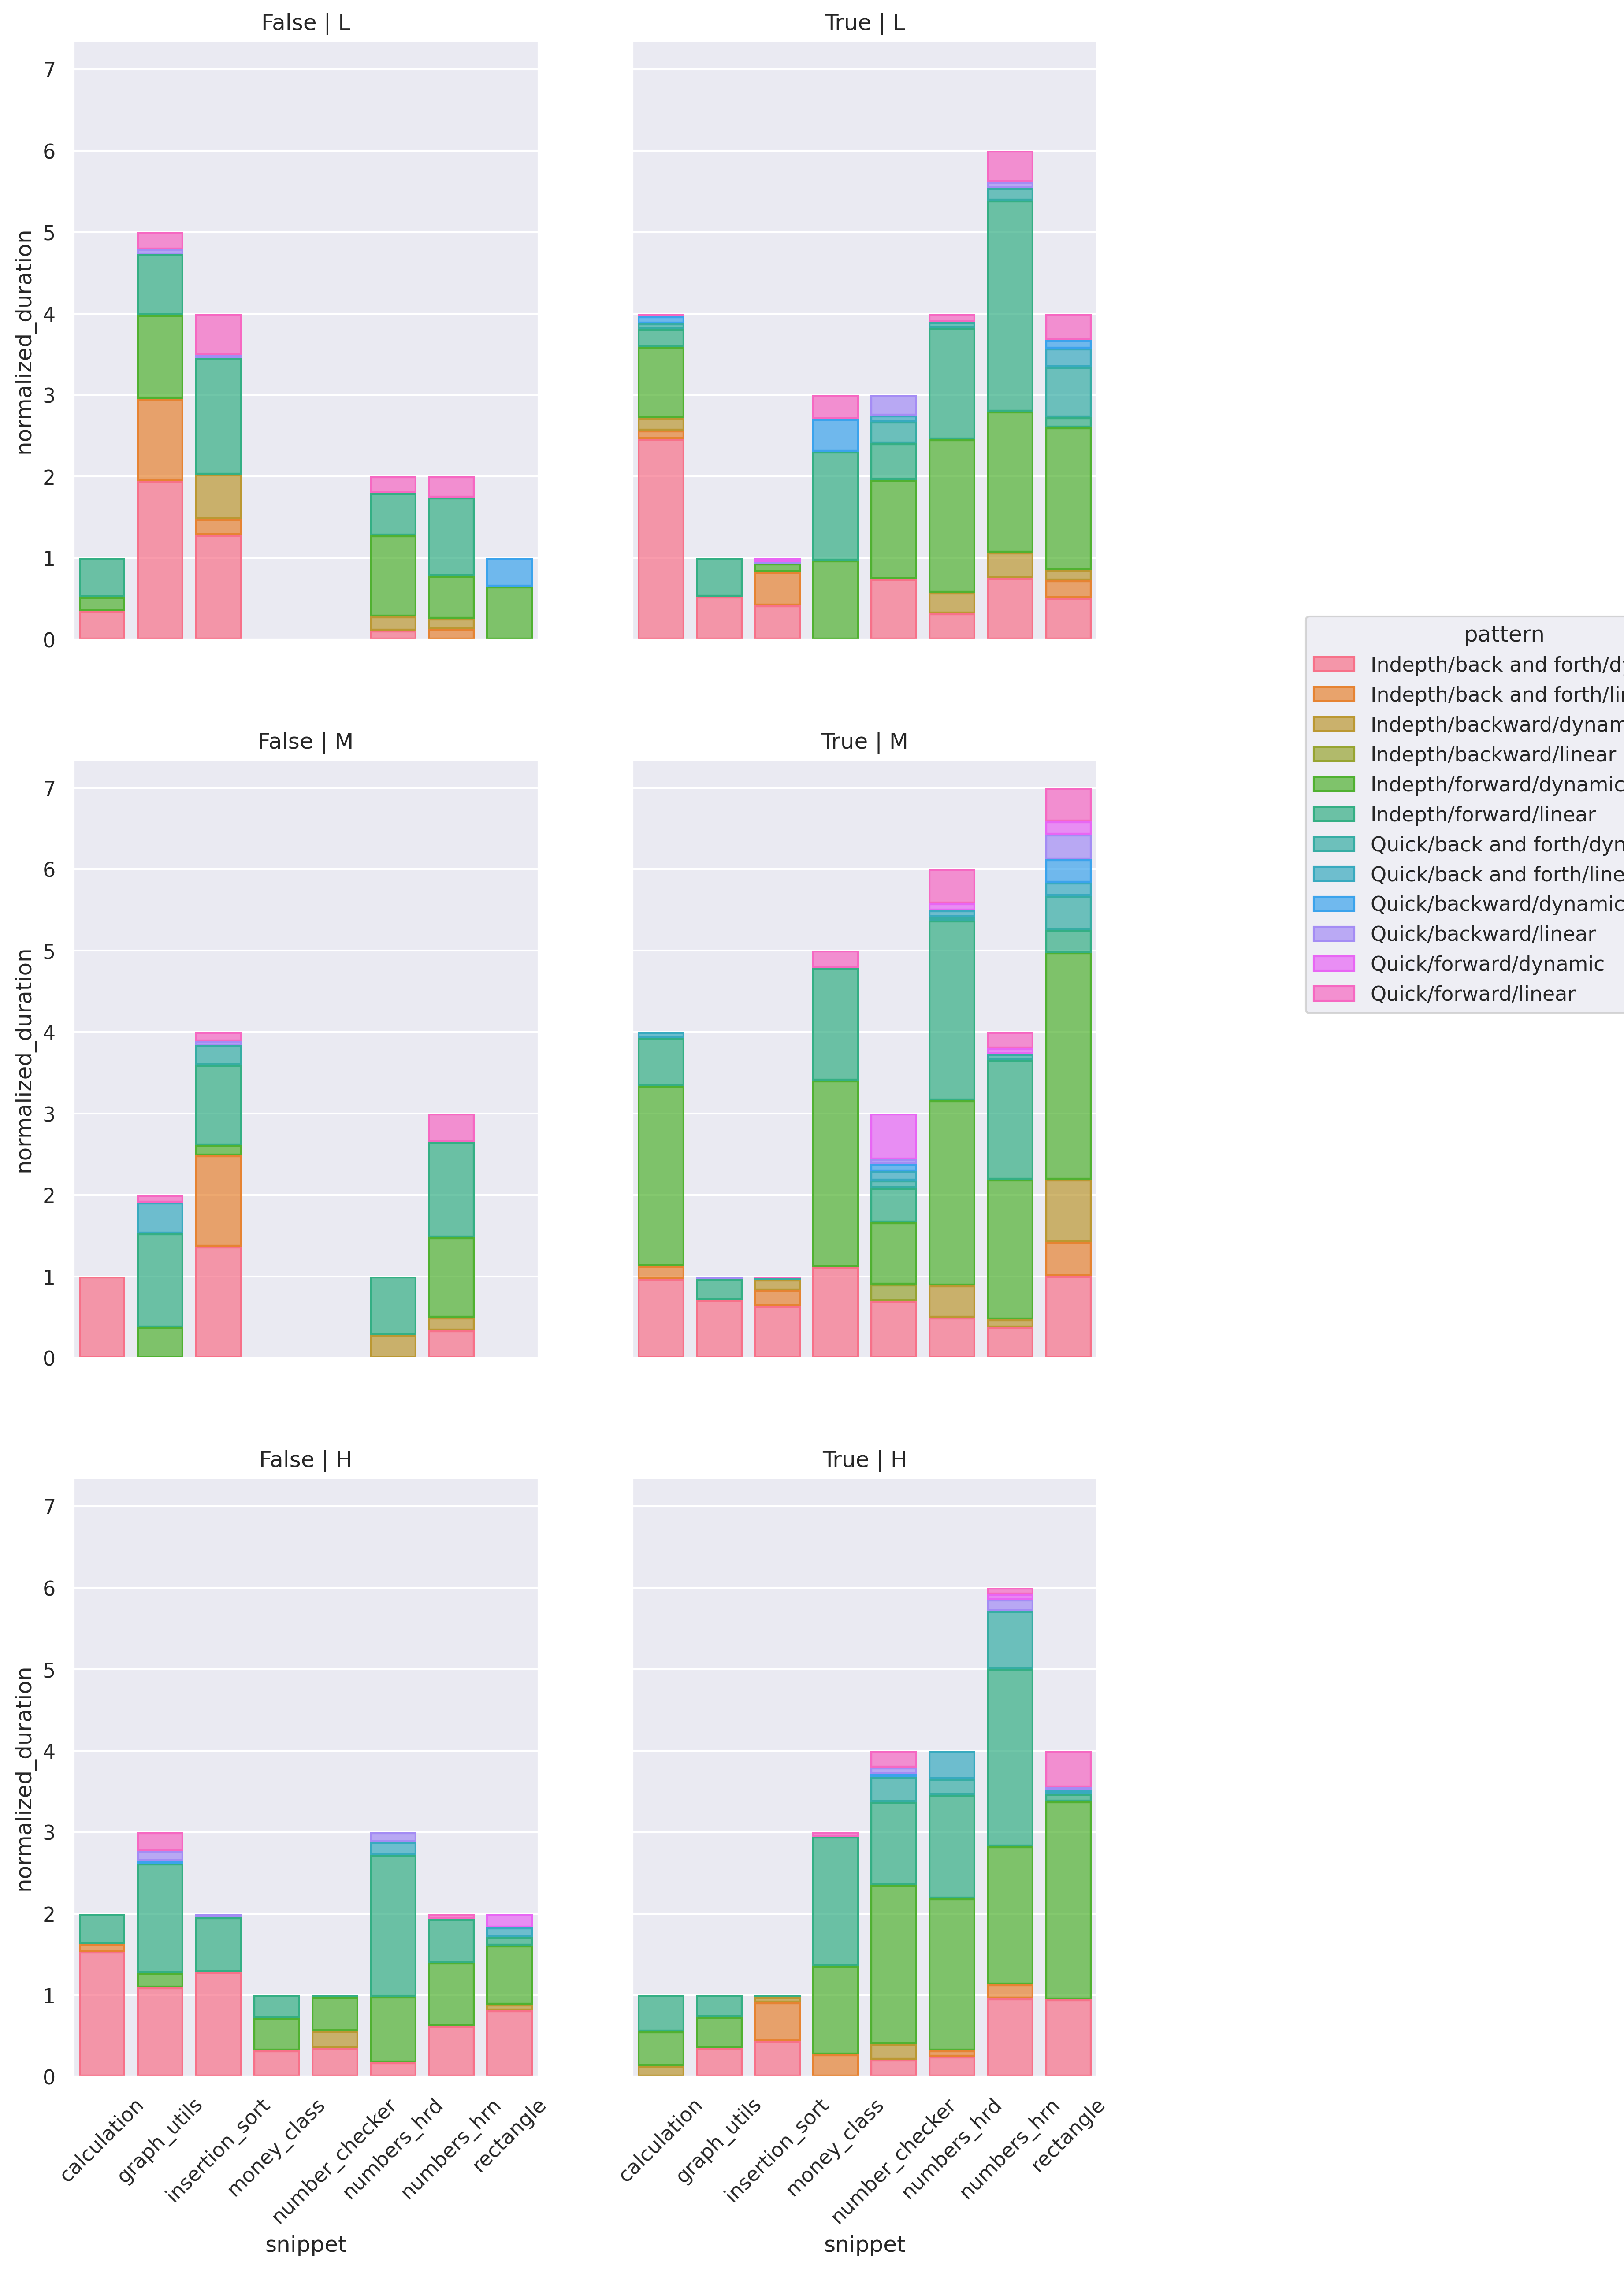

In [153]:
fig = Figure(figsize=(10, 20), dpi=300)
p = so.Plot(
    d,
    x='snippet',
    y='normalized_duration',
    color='pattern'
).facet(row='duration_bin', col='correctness', ).add(so.Bar(), so.Stack()).on(fig).plot()
# for ax in fig.axes:
ax = fig.axes[-1]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax = fig.axes[-2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig

/var/folders/9t/pnh1mqks36vfw7ngs3d7n8r00000gn/T/ipykernel_87546/1932366316.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d.groupby(['correctness', 'snippet', 'pattern']).mean().reset_index(),
/var/folders/9t/pnh1mqks36vfw7ngs3d7n8r00000gn/T/ipykernel_87546/1932366316.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/9t/pnh1mqks36vfw7ngs3d7n8r00000gn/T/ipykernel_87546/1932366316.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


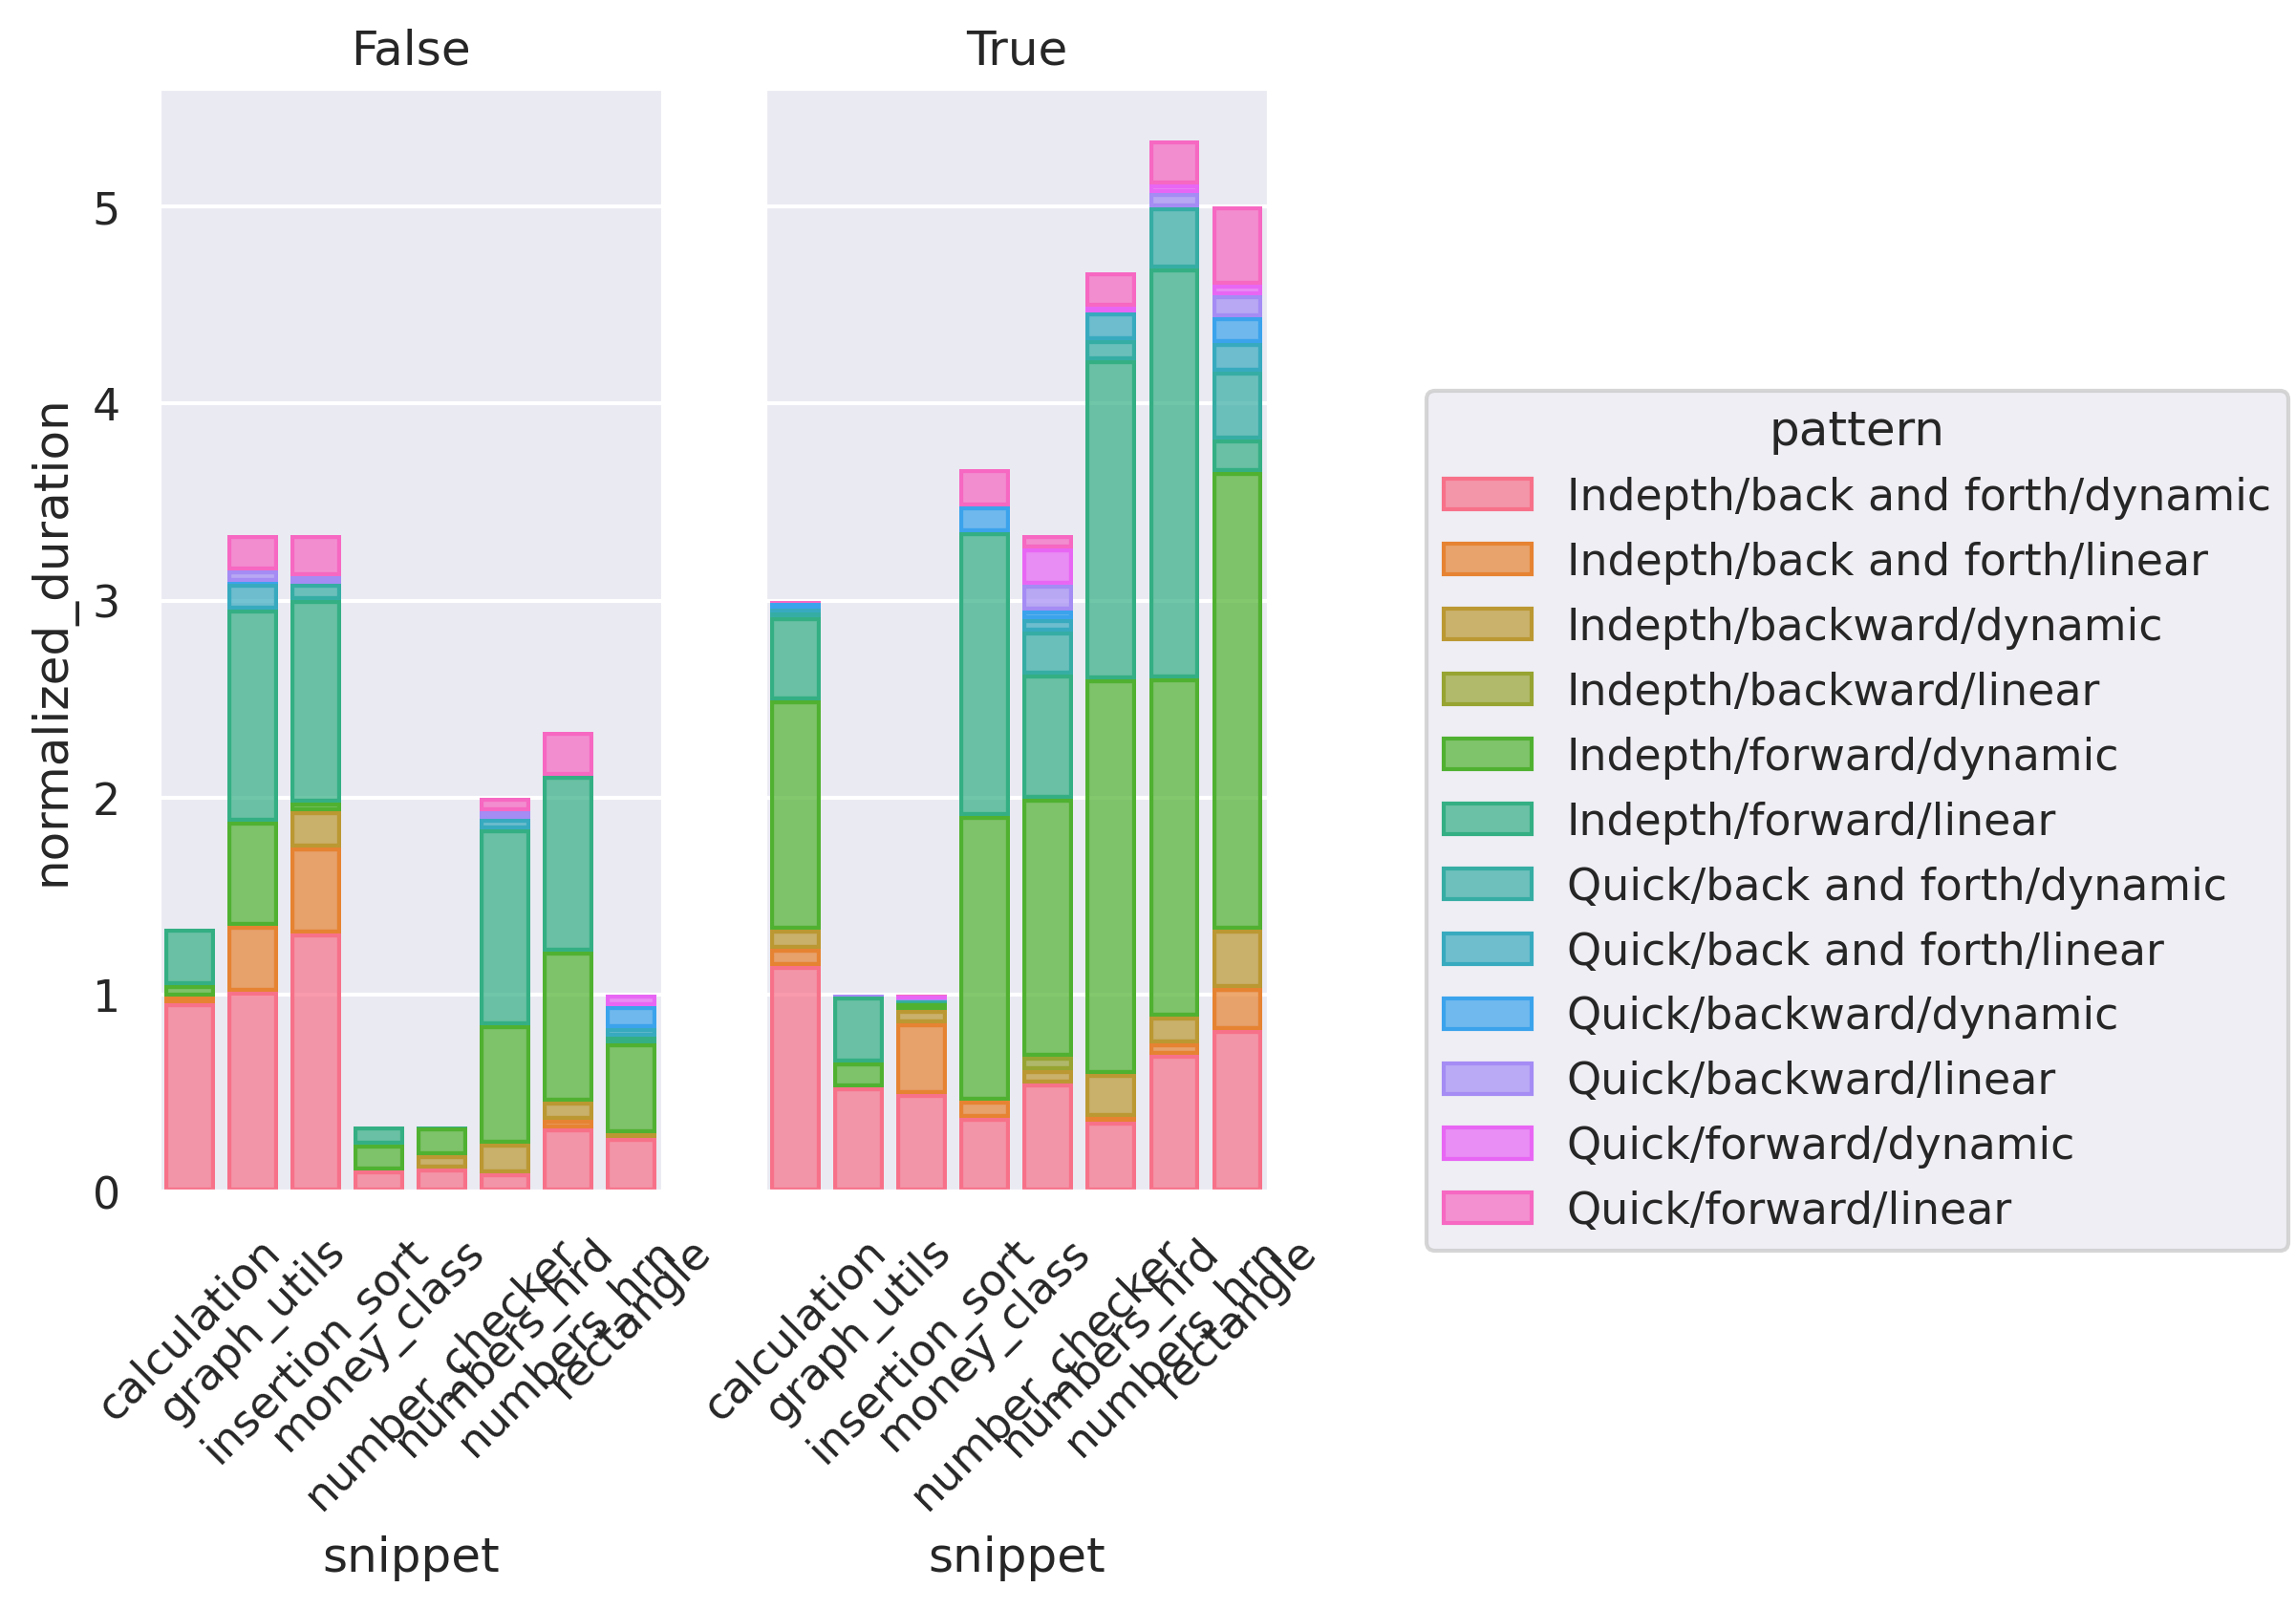

In [154]:
fig = Figure(figsize=(5, 5), dpi=300)
p = so.Plot(
    d.groupby(['correctness', 'snippet', 'pattern']).mean().reset_index(),
    x='snippet',
    y='normalized_duration',
    color='pattern'
).facet(col='correctness').add(so.Bar(), so.Stack()).on(fig).plot()
# for ax in fig.axes:
ax = fig.axes[-1]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax = fig.axes[-2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# fig
fig


In [155]:
with_normalized_durations.query('snippet == "rectangle"').query('correct == True').query('duration_bin == "L"')

correctness                             pattern  \
pid  tid                                                    
p105 t1          True         (Indepth, forward, dynamic)   
     t1          True    (Quick, back and forth, dynamic)   
     t1          True            (Quick, forward, linear)   
p89  t2          True  (Indepth, back and forth, dynamic)   
     t2          True   (Indepth, back and forth, linear)   
     t2          True          (Indepth, forward, linear)   
     t2          True    (Quick, back and forth, dynamic)   
     t2          True            (Quick, forward, linear)   
p94  t4          True         (Indepth, forward, dynamic)   
     t4          True            (Quick, forward, linear)   

          normalized_duration    snippet correct duration_bin  
pid  tid                                                       
p105 t1              0.717647  rectangle    True            L  
     t1              0.164706  rectangle    True            L  
     t1              0.117647  rectangle    True            L  
p89  t2              0.506849  rectangle    True            L  
     t2              0.219178  rectangle    True            L  
     t2              0.123288  rectangle    True            L  
     t2              0.095890  rectangle    True            L  
     t2              0.054795  rectangle    True            L  
p94  t4              0.848485  rectangle    True            L  
     t4              0.151515  rectangle    True            L

In [156]:
df.query("pid == 'p90' & tid == 't1'")

snippet  correctness investment selection_strategy direction  \
pid tid                                                                     
p90 t1   calculation         True    Indepth             linear   forward   
    t1   calculation         True    Indepth            dynamic   forward   
    t1   calculation         True    Indepth            dynamic   forward   
    t1   calculation         True    Indepth             linear   forward   
    t1   calculation         True    Indepth            dynamic  backward   
    t1   calculation         True    Indepth            dynamic   forward   

         start_time  end_time  duration                       pattern  
pid tid                                                                
p90 t1            0        27        27    (Indepth, forward, linear)  
    t1           27        66        39   (Indepth, forward, dynamic)  
    t1           66        70         4   (Indepth, forward, dynamic)  
    t1           73       103        30    (Indepth, forward, linear)  
    t1          103       120        17  (Indepth, backward, dynamic)  
    t1          120       130        10   (Indepth, forward, dynamic)

In [157]:
experiment_durations.query('snippet == "rectangle"').query('correct == True')

,,duration(s),snippet,correct,duration_bin
pid,tid,,,,
p101,t3,117.673,rectangle,True,L
p102,t2,106.595,rectangle,True,L
p105,t1,87.868,rectangle,True,L
p83,t3,115.511,rectangle,True,L
p84,t1,112.850,rectangle,True,L
p85,t2,180.211,rectangle,True,M
p89,t2,87.374,rectangle,True,VL
p90,t4,142.466,rectangle,True,L
p94,t4,74.013,rectangle,True,VL


In [164]:


from collections import Counter
def dedup(seq):
    results = []
    for item in seq:
        if not results or item != results[-1]:
            results.append(item)
    return tuple(results)

sequences = df.groupby(['pid', 'tid', 'correctness'])['pattern'].apply(list).reset_index()
sequences['deduped_sequences'] = sequences['pattern'].apply(dedup)

deduped_sequences = [tuple(pat) for pat in sequences['pattern'].tolist()]
c = Counter(deduped_sequences)
len(deduped_sequences)

sequences['deduped_sequences'].str.len().sort_values()

90      1
88      1
87      2
113     2
23      2
       ..
115     9
20      9
100     9
92     10
97     10
Name: deduped_sequences, Length: 127, dtype: int64

In [173]:
sequences.groupby(['correctness', 'deduped_sequences']).size().sort_values(ascending=False)

correctness  deduped_sequences                                                                                                                                                               
True         ((Indepth, forward, linear), (Indepth, forward, dynamic))                                                                                                                           7
             ((Indepth, forward, linear), (Indepth, back and forth, dynamic), (Indepth, forward, dynamic))                                                                                       2
             ((Quick, forward, linear), (Indepth, forward, linear), (Indepth, forward, dynamic))                                                                                                 2
False        ((Indepth, forward, linear), (Quick, forward, linear), (Indepth, forward, linear), (Indepth, forward, dynamic))                                                                     2
             ((Indepth, forwar

In [177]:
sequences.assign(pattern=sequences['pattern'].apply(tuple)).groupby([ 'pattern']).size().sort_values(ascending=False)

pattern
((Indepth, forward, linear), (Indepth, forward, dynamic), (Indepth, forward, dynamic))                                                                                                                        3
((Indepth, forward, linear), (Indepth, forward, dynamic), (Indepth, back and forth, dynamic))                                                                                                                 3
((Indepth, forward, linear), (Indepth, forward, dynamic), (Quick, back and forth, linear), (Indepth, forward, dynamic))                                                                                       2
((Indepth, back and forth, dynamic),)                                                                                                                                                                         1
((Indepth, forward, linear), (Quick, backward, dynamic), (Indepth, forward, dynamic), (Indepth, forward, dynamic), (Indepth, forward, dynamic), (Indepth, backwa

In [182]:
Counter(sequences.query('correctness == True')['pattern'].str[0]).most_common(10)

[(('Indepth', 'forward', 'linear'), 37),
 (('Indepth', 'forward', 'dynamic'), 13),
 (('Quick', 'forward', 'linear'), 11),
 (('Quick', 'back and forth', 'linear'), 5),
 (('Quick', 'backward', 'linear'), 4),
 (('Indepth', 'back and forth', 'dynamic'), 4),
 (('Quick', 'back and forth', 'dynamic'), 3),
 (('Quick', 'forward', 'dynamic'), 2),
 (('Indepth', 'back and forth', 'linear'), 2),
 (('Quick', 'backward', 'dynamic'), 1)]

In [185]:
Counter(sequences.query('correctness == False')['pattern'].str[0]).most_common(20)

[(('Indepth', 'forward', 'linear'), 24),
 (('Quick', 'forward', 'linear'), 6),
 (('Indepth', 'back and forth', 'dynamic'), 5),
 (('Indepth', 'back and forth', 'linear'), 4),
 (('Indepth', 'forward', 'dynamic'), 4),
 (('Quick', 'forward', 'dynamic'), 1),
 (('Quick', 'backward', 'linear'), 1)]

In [203]:
# df.query('snippet == "insertion_sort"').sort_values(by='direction').groupby('direction').count()

subset = df[
    df["snippet"].isin(["rectangle", "money_class", "insertion_sort", "calculation"])
].query("direction =='backward'")

subset.reset_index()[['pid', 'tid']].drop_duplicates().groupby(['pid']).size().sort_values(ascending=False)

pid
p101    2
p84     2
p90     2
p91     2
p97     2
p103    1
p105    1
p106    1
p86     1
p87     1
p89     1
p93     1
p94     1
p98     1
dtype: int64

In [204]:
df[
    df["snippet"].isin(["rectangle", "money_class", "insertion_sort", "calculation"])
].query("direction =='backward'")
# 4 first, 1 primary pat - rectangle
# 1 primary pat - insertion_sort
# 1 first  , 1 primary - calculation

snippet  correctness investment selection_strategy direction  \
pid  tid                                                                        
p48  t3      graph_utils        False      Quick             linear  backward   
p58  t2      graph_utils         True      Quick             linear  backward   
p72  t2      graph_utils        False      Quick             linear  backward   
     t2      graph_utils        False      Quick             linear  backward   
p106 t2        rectangle         True      Quick             linear  backward   
     t2        rectangle         True      Quick            dynamic  backward   
     t2        rectangle         True      Quick            dynamic  backward   
p98  t4        rectangle         True    Indepth            dynamic  backward   
     t4        rectangle         True      Quick            dynamic  backward   
p93  t1        rectangle         True      Quick             linear  backward   
p84  t1        rectangle         True      Quick             linear  backward   
     t1        rectangle         True    Indepth            dynamic  backward   
     t1        rectangle         True      Quick             linear  backward   
     t1        rectangle         True    Indepth            dynamic  backward   
p86  t3        rectangle         True      Quick             linear  backward   
p97  t3        rectangle        False    Indepth            dynamic  backward   
p101 t3        rectangle         True      Quick            dynamic  backward   
     t3        rectangle         True    Indepth            dynamic  backward   
p91  t1        rectangle        False      Quick            dynamic  backward   
p54  t3       number_hrd        False    Indepth            dynamic  backward   
p55  t1       number_hrd        False      Quick             linear  backward   
p58  t3       number_hrd         True    Indepth            dynamic  backward   
p41  t3       number_hrd         True    Indepth            dynamic  backward   
p76  t3       number_hrd         True    Indepth            dynamic  backward   
p79  t3       number_hrd        False    Indepth            dynamic  backward   
p101 t1   number_checker         True      Quick             linear  backward   
     t1   number_checker         True    Indepth             linear  backward   
p103 t1   number_checker         True    Indepth            dynamic  backward   
p104 t2   number_checker         True      Quick             linear  backward   
p89  t4   number_checker         True      Quick            dynamic  backward   
p92  t4   number_checker         True      Quick             linear  backward   
p97  t2   number_checker         True      Quick            dynamic  backward   
p86  t2   number_checker        False    Indepth            dynamic  backward   
     t2   number_checker        False    Indepth            dynamic  backward   
     t2   number_checker        False    Indepth            dynamic  backward   
p87  t1   insertion_sort        False      Quick             linear  backward   
p89  t3   insertion_sort         True    Indepth            dynamic  backward   
p90  t3   insertion_sort        False      Quick             linear  backward   
p91  t2   insertion_sort        False    Indepth            dynamic  backward   
     t2   insertion_sort        False    Indepth            dynamic  backward   
p94  t3   insertion_sort         True    Indepth            dynamic  backward   
p97  t1   insertion_sort        False      Quick             linear  backward   
p105 t2   insertion_sort         True      Quick             linear  backward   
p101 t4      calculation         True    Indepth            dynamic  backward   
p84  t2      calculation         True      Quick            dynamic  backward   
     t2      calculation         True    Indepth            dynamic  backward   
     t2      calculation         True      Quick            dynamic  backward   
p90  t1      calculation         True    Indepth